# Principal Component Analysis with Cancer Data

In [137]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [138]:
df_bc = pd.read_csv("breast-cancer-wisconsin-data.csv")
print(df_bc.shape)
df_bc.head()

(699, 11)


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [139]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
    
    # Not removing here as it is required to identify duplicate values
    
#df_bc = df.drop(labels="ID",axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [140]:
print(df_bc.shape)
print(df_bc.info())

(699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None


In [141]:
df_bc.isnull().sum().sort_values(ascending=False) 

Class                          0
Mitoses                        0
Bland Chromatin                0
Normal Nucleoli                0
Bare Nuclei                    0
Single Epithelial Cell Size    0
Marginal Adhesion              0
Cell Shape                     0
Cell Size                      0
ClumpThickness                 0
ID                             0
dtype: int64

In [142]:
df_bc.dtypes.value_counts()

int64     10
object     1
dtype: int64

In [143]:
df_bc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


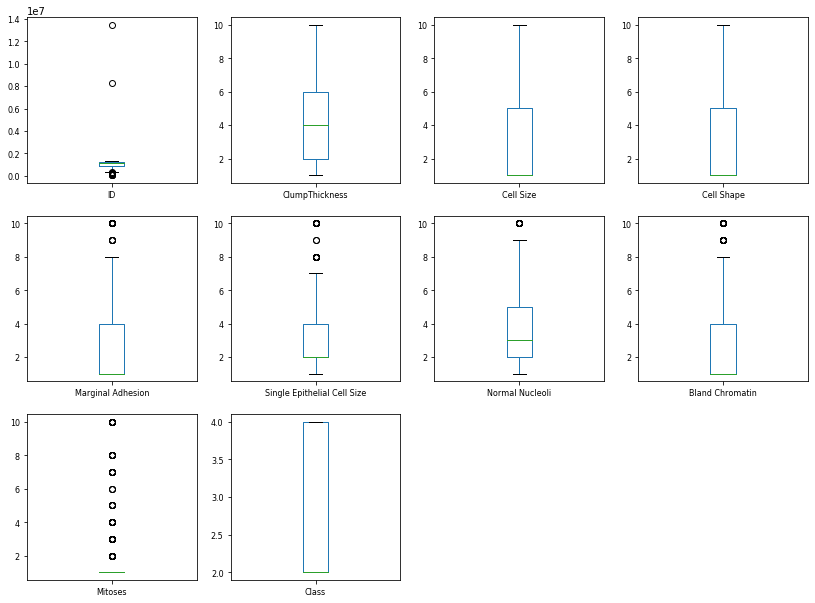

In [144]:
# box and whisker plots
df_bc.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [145]:
# We could see "?" values in column, this should be removed from data set
#Replace ? by nan
df_bc = df_bc.replace('?',np.nan)
print(df_bc.isnull().sum().sort_values(ascending=False) )

# convert Bare Nuclei into numerial
df_bc["Bare Nuclei"] = df_bc["Bare Nuclei"].astype("float64")


Bare Nuclei                    16
Class                           0
Mitoses                         0
Bland Chromatin                 0
Normal Nucleoli                 0
Single Epithelial Cell Size     0
Marginal Adhesion               0
Cell Shape                      0
Cell Size                       0
ClumpThickness                  0
ID                              0
dtype: int64


In [146]:
# No missing values found. So let us try to remove ? from bare nuclei column
df_bc.isnull().sum().sum()

# We have already converted ? to null and it shows 16 values as null


16

In [147]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# we will impute it with the mean
df_bc["Bare Nuclei"].fillna(df_bc["Bare Nuclei"].mean(), inplace = True) 
df_bc.isnull().sum().sum()

0

In [148]:
#checking for duplicate data
df_dup = df_bc[df_bc.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
df_dup

Duplicate Rows except first occurrence based on all columns are :


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1.0,3,1,1,2
253,1100524,6,10,10,2,8,10.0,7,3,3,4
254,1116116,9,10,10,1,10,8.0,3,3,1,4
258,1198641,3,1,1,1,2,1.0,3,1,1,2
272,320675,3,3,5,2,3,10.0,7,1,1,4
338,704097,1,1,1,1,1,1.0,2,1,1,2
561,1321942,5,1,1,1,2,1.0,3,1,1,2
684,466906,1,1,1,1,2,1.0,1,1,1,2


In [149]:
#Treating duplicates

df_bc.drop_duplicates(subset=None, keep='first', inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


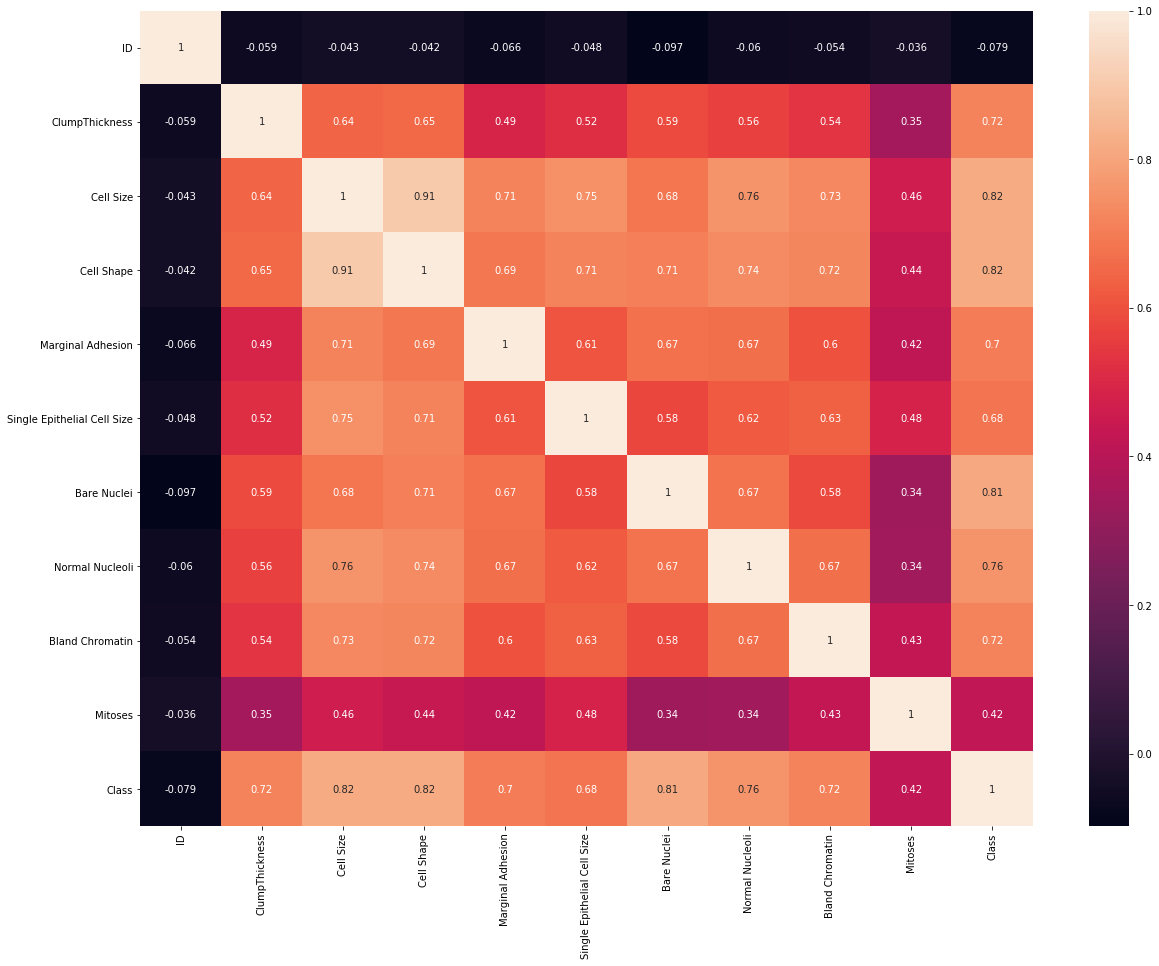

In [150]:
# Check for correlation of variable
plt.figure(figsize=(20,15))
sns.heatmap(df_bc.corr(), annot=True )

In [151]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

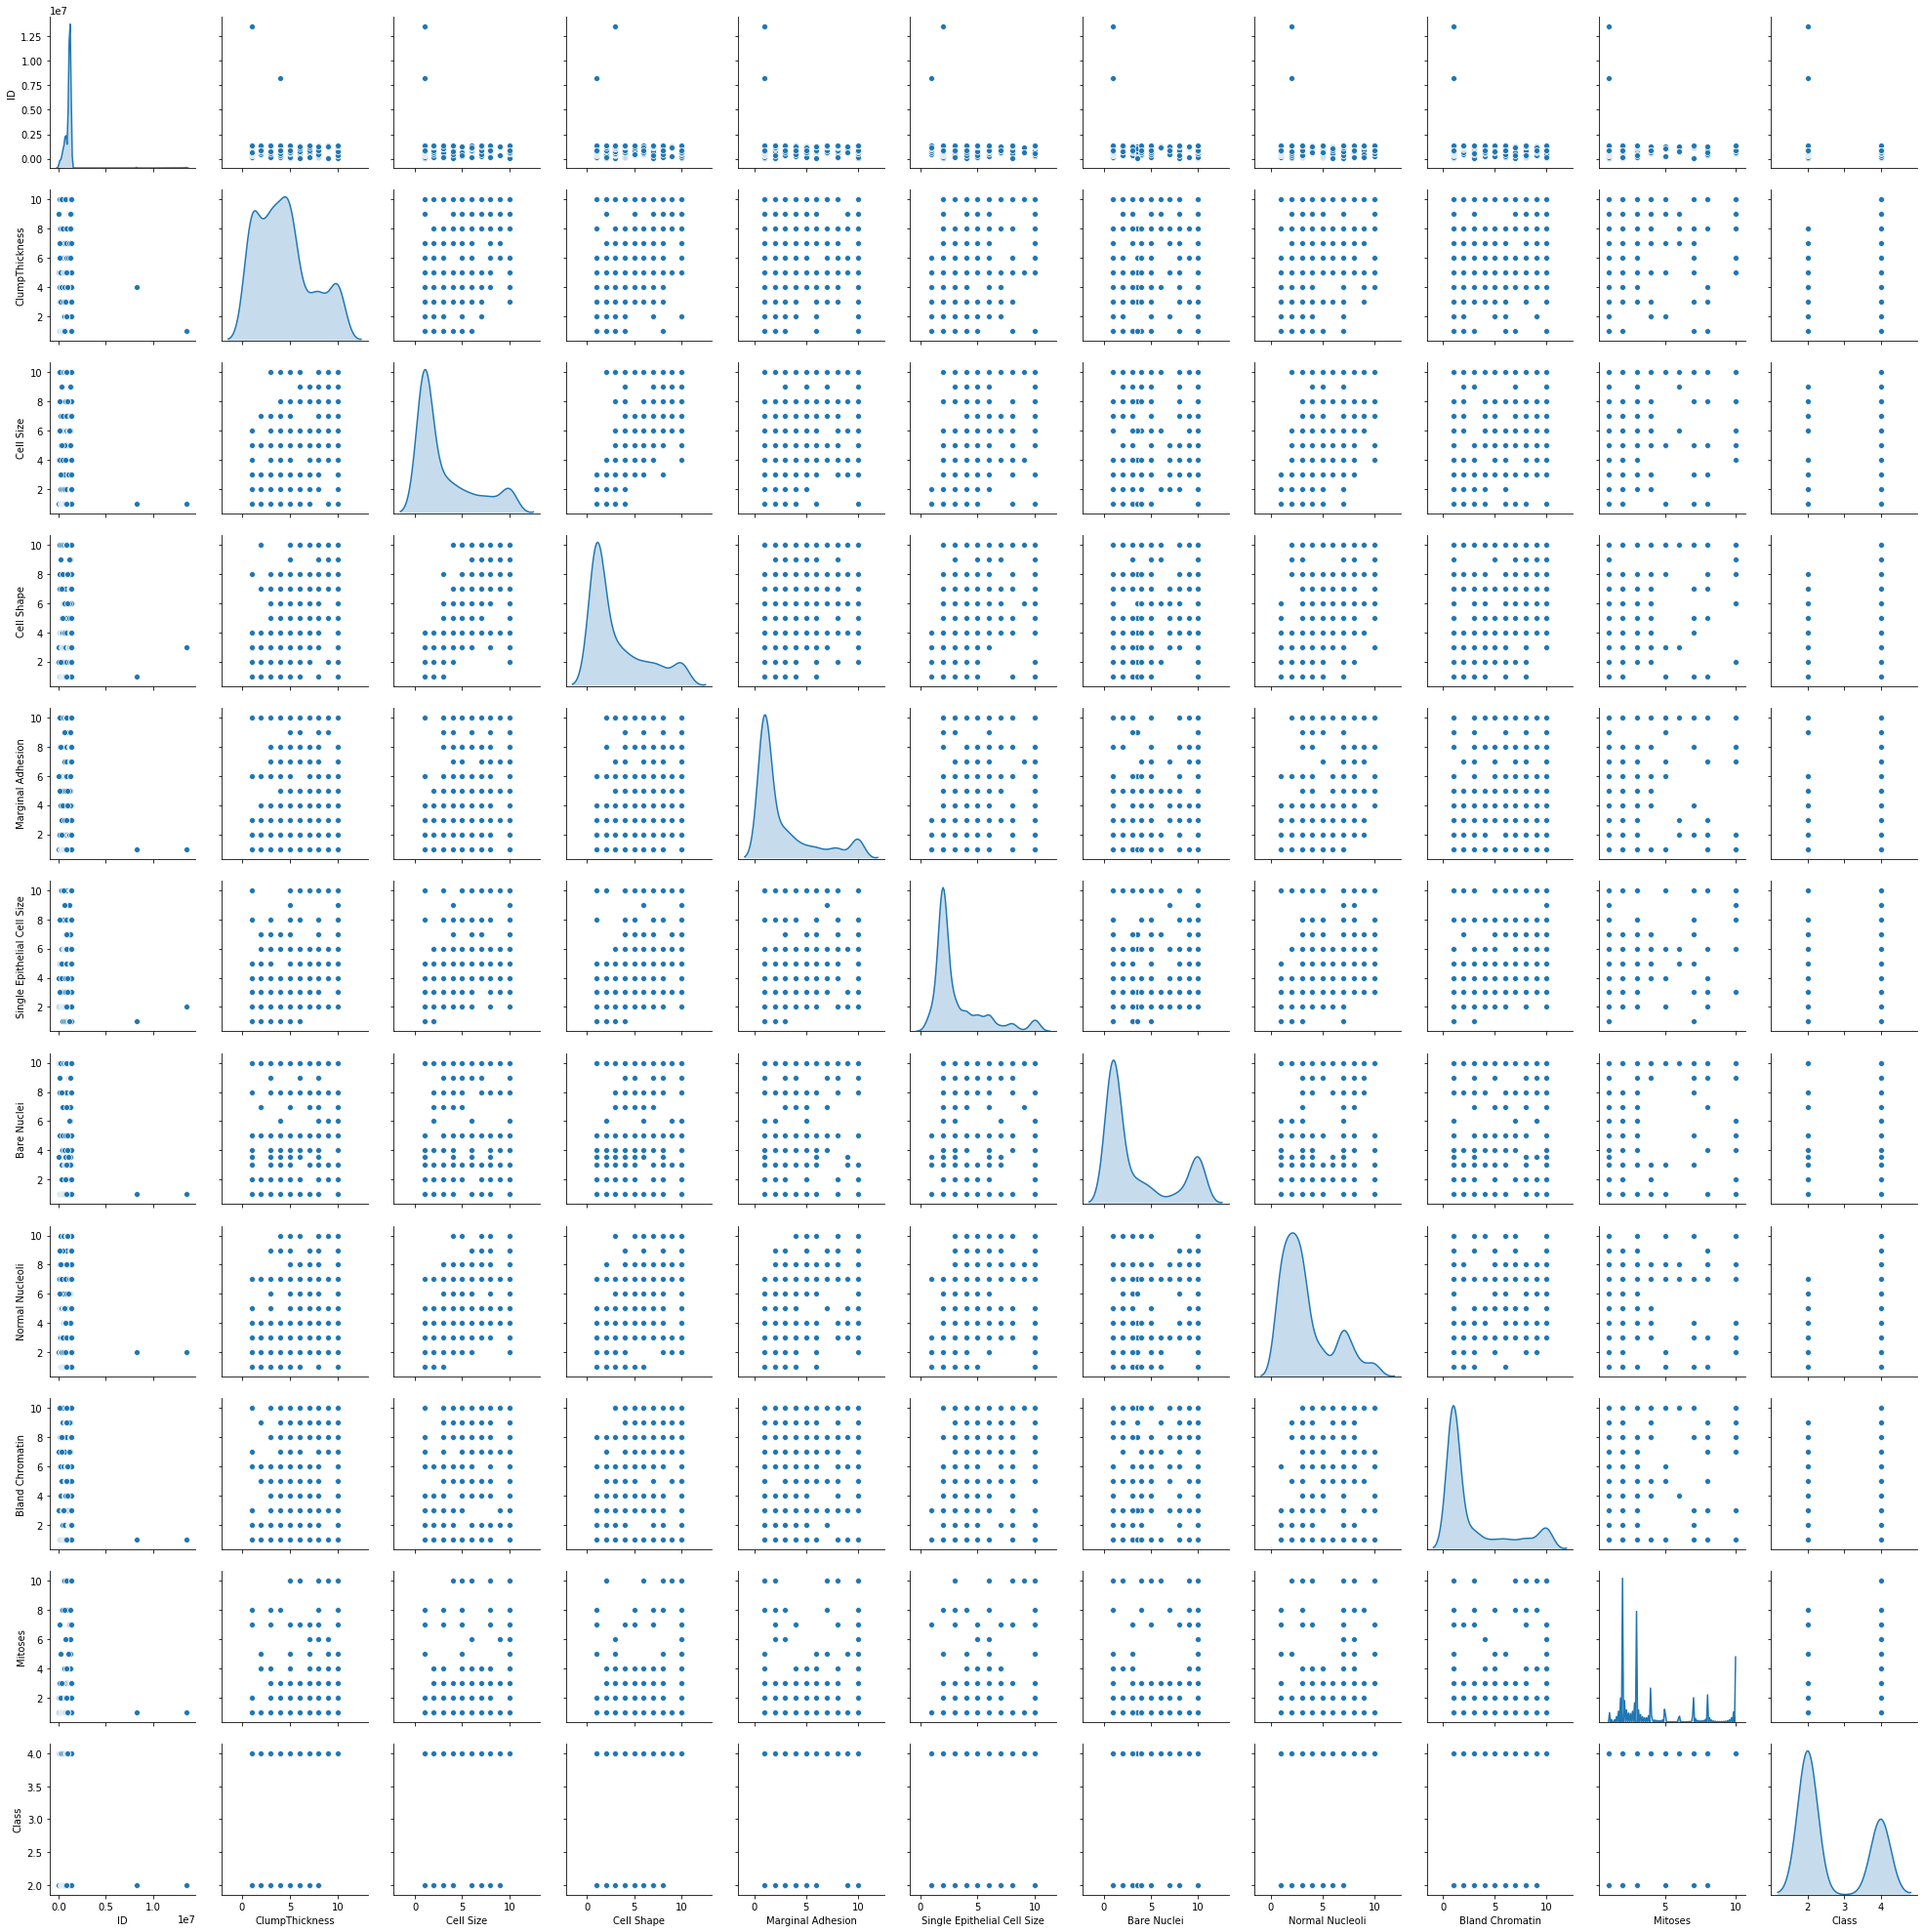

In [106]:
#Let us check for pair plots
sns.pairplot(df_bc, diag_kind="kde") 

In [152]:
# Relationship between variables shows come correlation.
df_bc.corr()
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059165,-0.043273,-0.042184,-0.066230,-0.047642,-0.097466,-0.059645,-0.054001,-0.036001,-0.079459
ClumpThickness,-0.059165,1.000000,0.643340,0.653752,0.487949,0.517448,0.588035,0.561076,0.535712,0.350354,0.716938
Cell Size,-0.043273,0.643340,1.000000,0.905420,0.713117,0.747111,0.684906,0.759525,0.727239,0.460064,0.817720
Cell Shape,-0.042184,0.653752,0.905420,1.000000,0.690989,0.714393,0.706537,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,-0.066230,0.487949,0.713117,0.690989,1.000000,0.608477,0.670708,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,-0.047642,0.517448,0.747111,0.714393,0.608477,1.000000,0.578204,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,-0.097466,0.588035,0.684906,0.706537,0.670708,0.578204,1.000000,0.674385,0.580961,0.339299,0.813809
Normal Nucleoli,-0.059645,0.561076,0.759525,0.738455,0.669813,0.620518,0.674385,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,-0.054001,0.535712,0.727239,0.724693,0.602453,0.634058,0.580961,0.669059,1.000000,0.427644,0.715540
Mitoses,-0.036001,0.350354,0.460064,0.440592,0.417167,0.482644,0.339299,0.343821,0.427644,1.000000,0.424111


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

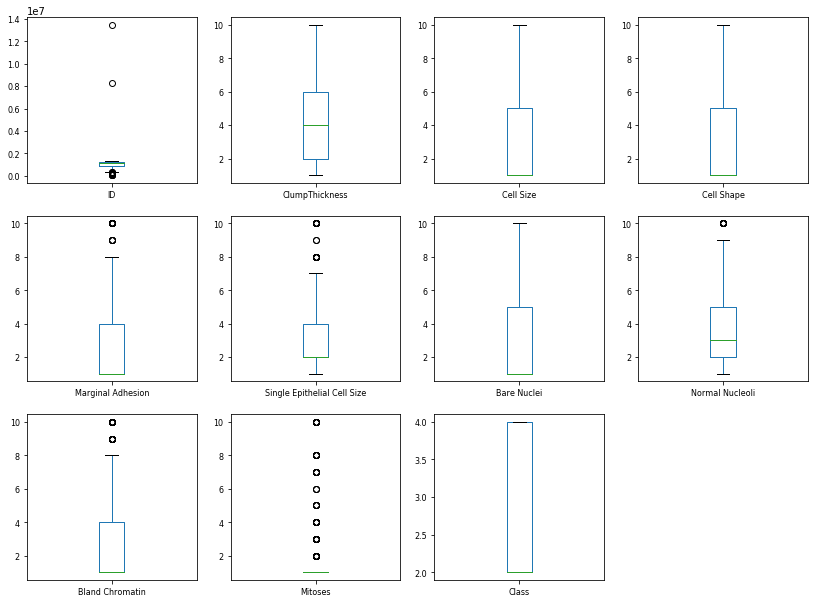

In [153]:
df_bc.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

In [154]:
## Looks like column ID is spoiling the show. Dropping it as duplicates have already been removed.

#Dropping categorical column ID
df_bc = df_bc.drop(labels="ID",axis=1)

#Dropping categorical column ID
df_bc = df_bc.drop(labels="Class",axis=1)

In [155]:
# function to replace upper outlier with their max value of (Q3 + 1.5 * IRQ)

def treat_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)
    

for i in df_bc.columns:
    treat_outliers(df_bc,i)

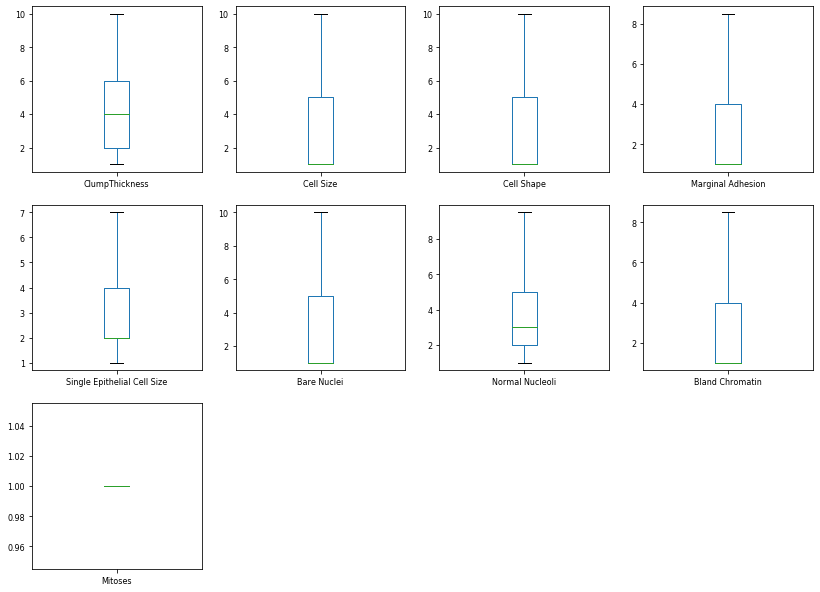

In [156]:
df_bc.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

In [157]:
# We can see outyliers have been treated

#We can see column Motoses is not adding any value, we can drop it
df_bc.drop(axis=1,columns='Mitoses',inplace=True)


In [158]:
#Scaling variables as required

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_bc_scaled = scaler.fit_transform(df_bc)

# Q6 Create a covariance matrix for identifying Principal components

In [159]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df_bc_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.5019105  0.54679763 0.58888683
  0.56499378 0.54638885]
 [0.64427196 1.00144928 0.90673173 0.72819011 0.78187347 0.68589838
  0.76093535 0.73138126]
 [0.65469961 0.90673173 1.00144928 0.70385072 0.75174621 0.70756057
  0.73993831 0.72810225]
 [0.5019105  0.72819011 0.70385072 1.00144928 0.66437672 0.68402006
  0.68511865 0.62573722]
 [0.54679763 0.78187347 0.75174621 0.66437672 1.00144928 0.62441245
  0.65984823 0.68937073]
 [0.58888683 0.68589838 0.70756057 0.68402006 0.62441245 1.00144928
  0.67966448 0.59873939]
 [0.56499378 0.76093535 0.73993831 0.68511865 0.65984823 0.67966448
  1.00144928 0.67673281]
 [0.54638885 0.73138126 0.72810225 0.62573722 0.68937073 0.59873939
  0.67673281 1.00144928]]


# Q7 Identify eigen values and eigen vector

In [160]:
# Step 2- Get eigen values and eigen vector

In [161]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.30792198 -0.88802753 -0.00103545  0.03388713  0.18826745 -0.04072314
   0.27889248  0.02361599]
 [ 0.38687291  0.03971532 -0.73765964  0.1882478  -0.36616352 -0.1941465
  -0.08196415 -0.30114176]
 [ 0.38385467 -0.02501609  0.66024801  0.15588841 -0.53487861 -0.15502575
  -0.16155668 -0.23573817]
 [ 0.34527337  0.34355415  0.05377211 -0.42715331  0.00744783 -0.23010066
   0.7234262   0.03253015]
 [ 0.35369736  0.20749535  0.07884556  0.33723922  0.57952972 -0.52080097
  -0.25468968  0.19985436]
 [ 0.34277276 -0.07500488 -0.08119206 -0.64112736 -0.10419069  0.07247699
  -0.49632414  0.44361965]
 [ 0.35642112  0.12728993  0.06075312 -0.14943768  0.43166857  0.52362586
  -0.13452426 -0.59339711]
 [ 0.34543349  0.16214732 -0.02320774  0.45776312 -0.10621154  0.57706054
   0.19171221  0.51309351]]

 Eigen Values 
%s [5.74040667 0.53812472 0.08995807 0.45509401 0.2526775  0.33881819
 0.29048887 0.30602617]


# Q8 Find variance and cumulative variance by each eigen vector

In [162]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()
train_eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]


In [165]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 

cum_var_exp = np.cumsum(var_explained)  
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.71651241 0.78368066 0.84048508 0.88277606 0.92097398 0.95723254
 0.98877151 1.        ]


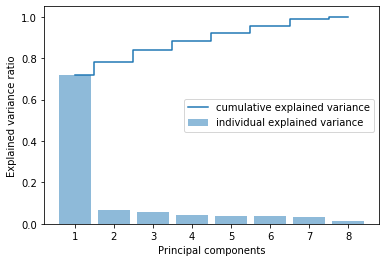

In [168]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [169]:
P_reduce = np.array(train_eigvectors_sorted[0:6])   # Reducing from 9 to 6 dimension space
X_std_6D = np.dot(df_bc_scaled,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_6D)  # converting array to dataframe for pairplot

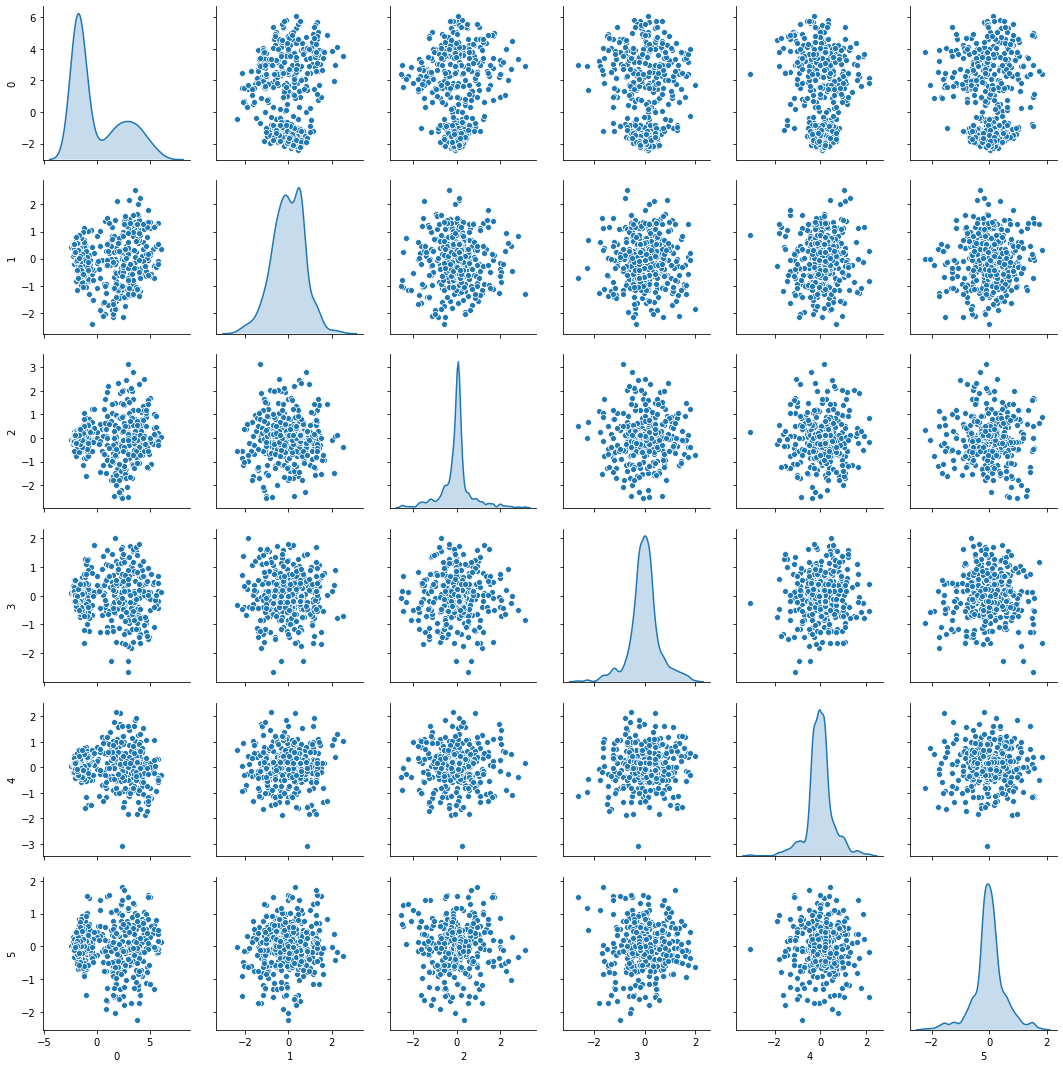

In [170]:
sns.pairplot(Proj_data_df,diag_kind='kde')

# Q10 Find correlation between components and features

In [171]:
data = pd.DataFrame(eigenvectors[0:6], columns=df_bc.columns)
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin
0,0.307922,-0.888028,-0.001035,0.033887,0.188267,-0.040723,0.278892,0.023616
1,0.386873,0.039715,-0.737660,0.188248,-0.366164,-0.194147,-0.081964,-0.301142
2,0.383855,-0.025016,0.660248,0.155888,-0.534879,-0.155026,-0.161557,-0.235738
3,0.345273,0.343554,0.053772,-0.427153,0.007448,-0.230101,0.723426,0.032530
4,0.353697,0.207495,0.078846,0.337239,0.579530,-0.520801,-0.254690,0.199854


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [173]:
df_jokes = pd.read_csv("jokes.csv")

print(df_jokes.shape)
df_jokes.head()

(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [174]:
ratings = df_jokes.iloc[0:200,1:]

#NumJokes = df_jokes["NumJokes"].iloc[0:200]
print(ratings.shape)
ratings.head()

(200, 100)


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [175]:
ratings = ratings.replace(99.00,0)

In [187]:
ratings.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [209]:
ratings_diff= ratings.mean(axis=0)

In [210]:
ratings_diff=pd.DataFrame(ratings_diff)

In [211]:
ratings_iff.head(5)

,0
Joke1,0.53005
Joke2,0.59390
Joke3,0.23765
Joke4,-0.70100
Joke5,-0.03790


In [213]:
ratings_diff.columns = ['Mean_Rating']

In [215]:
ratings_diff.sort_values(['Mean_Rating'],ascending=False).head(10)

,Mean_Rating
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710
